In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import eurostat
import numpy as np
import xlrd

Made by Vasil Tsenkov

https://www.imf.org/external/datamapper/PPPGDP@WEO/LVA?zoom=LVA&highlight=LVA
<br>
https://www.imf.org/external/datamapper/PPPGDP@WEO/LVA/BGR

In [10]:
gdpL = pd.read_excel("D:\latvia\latviaGDPPPP.xls")
gdpL.replace('no data', np.nan, inplace=True)
gdpL = gdpL.melt(id_vars=[('GDP, current prices (Purchasing power parity; billions of international dollars)')], var_name='year', value_name='GDP_L')
gdpL = gdpL.dropna()
gdpL

,"GDP, current prices (Purchasing power parity; billions of international dollars)",year,GDP_L
49,Latvia,1992,16.049
53,Latvia,1993,14.556
57,Latvia,1994,15.194
61,Latvia,1995,15.189
65,Latvia,1996,15.868
69,Latvia,1997,17.568
73,Latvia,1998,18.891
77,Latvia,1999,19.685
81,Latvia,2000,21.274
85,Latvia,2001,23.129


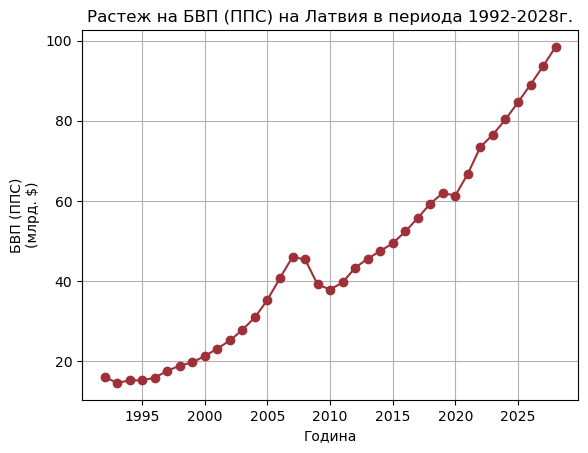

In [9]:
plt.plot(gdpL["year"], gdpL["GDP_L"], marker = 'o', color = '#9E3039')
plt.title('Растеж на БВП (ППС) на Латвия в периода 1992-2028г.')
plt.xlabel('Година')
plt.ylabel('БВП (ППС)\n(млрд. $)')
plt.grid(True)

In [19]:
gdp = pd.read_excel("D:\latvia\LVBGGDP.xlsx")
gdp.replace('no data', np.nan, inplace=True)
gdp = gdp.melt(id_vars=[('GDP, current prices (Purchasing power parity; billions of international dollars)')], var_name='year', value_name='GDP_L')
gdp.rename(columns = {'GDP, current prices (Purchasing power parity; billions of international dollars)' : 'Country'}, inplace = True)
gdp = gdp.dropna()
gdp

,Country,year,GDP_L
1,Bulgaria,1980,41.234
6,Bulgaria,1981,47.528
11,Bulgaria,1982,52.584
16,Bulgaria,1983,56.282
21,Bulgaria,1984,60.996
...,...,...,...
232,Latvia,2026,89.030
236,Bulgaria,2027,263.733
237,Latvia,2027,93.604
241,Bulgaria,2028,276.249


In [28]:
# Group by 'Country' and create a dictionary of DataFrames
country_groups = dict(tuple(gdp.groupby('Country')))

# Access each DataFrame using the country name
BG_data = country_groups['Bulgaria']
LV_data = country_groups['Latvia']

# For BG excluding data before 1992, making a copy because I use a subset of the data
BG_data = BG_data[BG_data['year'] >= 1992].copy()

# Calculating GDP growth rate
BG_data['Growth'] = BG_data['GDP_L'].pct_change() * 100
LV_data['Growth'] = LV_data['GDP_L'].pct_change() * 100

# Printing data
print(BG_data.head())
print(LV_data.head())

     Country  year   GDP_L    Growth
61  Bulgaria  1992  65.947       NaN
66  Bulgaria  1993  59.662 -9.530380
71  Bulgaria  1994  58.703 -1.607388
76  Bulgaria  1995  58.974  0.461646
81  Bulgaria  1996  63.180  7.131956
   Country  year   GDP_L    Growth
62  Latvia  1992  16.049       NaN
67  Latvia  1993  14.556 -9.302760
72  Latvia  1994  15.194  4.383072
77  Latvia  1995  15.189 -0.032908
82  Latvia  1996  15.868  4.470340


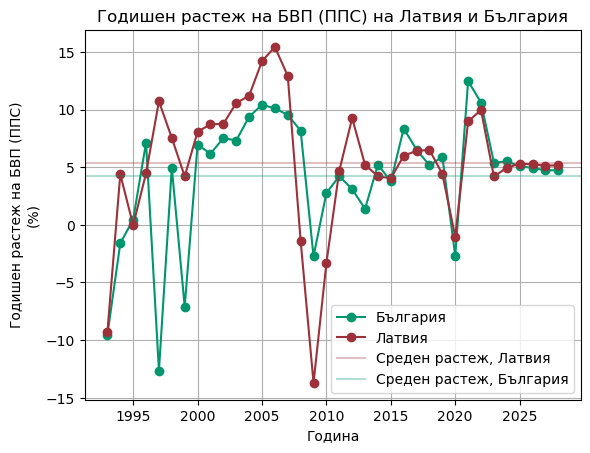

In [43]:
# Calculating average growth
average_growth_L = LV_data["Growth"].mean()
average_growth_B = BG_data["Growth"].mean()

# Plotting the data
plt.plot(BG_data["year"], BG_data["Growth"], marker = 'o', color = '#00966E', label = "България")
plt.plot(LV_data["year"], LV_data["Growth"], marker = 'o', color = '#9E3039', label = "Латвия")

# Plotting average growth
plt.axhline(y = average_growth_L, color = '#9E3039', label = "Среден растеж, Латвия", alpha = 0.3)
plt.axhline(y = average_growth_B, color = '#00966E', label = "Среден растеж, България", alpha = 0.3)

# Axis labels and title
plt.xlabel('Година')
plt.ylabel('Годишен растеж на БВП (ППС)\n(%)')
plt.title('Годишен растеж на БВП (ППС) на Латвия и България')

# Legend and grid
plt.legend()
plt.grid(True)

In [7]:
# Importing data from IMF for BG and LV
gdpPC = pd.read_excel("D:\latvia\gdpPC.xlsx")

# Cleaning data
gdpPC.replace('no data', np.nan, inplace=True)
gdpPC = gdpPC.melt(id_vars=[('GDP per capita, current prices (Purchasing power parity; international dollars per capita)')], var_name='year', value_name='GDP_PC')
gdpPC.rename(columns = {'GDP per capita, current prices (Purchasing power parity; international dollars per capita)' : 'Country'}, inplace = True)
gdpPC = gdpPC.dropna()
gdpPC

,Country,year,GDP_PC
1,Bulgaria,1980,4681.662
6,Bulgaria,1981,5380.251
11,Bulgaria,1982,5935.567
16,Bulgaria,1983,6337.146
21,Bulgaria,1984,6855.813
...,...,...,...
232,Latvia,2026,47845.031
236,Bulgaria,2027,42152.934
237,Latvia,2027,50404.135
241,Bulgaria,2028,44419.874


In [9]:
# Group by 'Country' and create a dictionary of DataFrames
country_groups = dict(tuple(gdpPC.groupby('Country')))

# Access each DataFrame using the country name
BG_dataPC = country_groups['Bulgaria']
LV_dataPC = country_groups['Latvia']

# For BG excluding data before 1992, making a copy because I use a subset of the data
BG_dataPC = BG_dataPC[BG_dataPC['year'] >= 1992].copy()

# Printing data
print(BG_dataPC.head())
print(LV_dataPC.head())

     Country  year    GDP_PC
61  Bulgaria  1992  7662.309
66  Bulgaria  1993  7013.142
71  Bulgaria  1994  6982.841
76  Bulgaria  1995  7095.044
81  Bulgaria  1996  7681.083
   Country  year    GDP_PC
62  Latvia  1992  5995.897
67  Latvia  1993  5454.632
72  Latvia  1994  5783.024
77  Latvia  1995  6074.359
82  Latvia  1996  6425.454


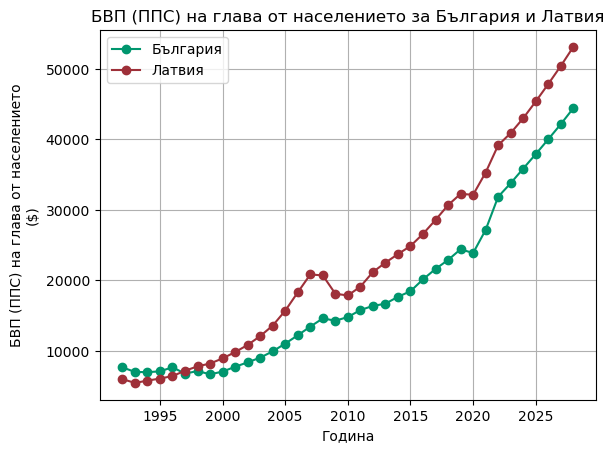

In [10]:
# Plotting the data
plt.plot(BG_dataPC["year"], BG_dataPC["GDP_PC"], marker = 'o', color = '#00966E', label = "България")
plt.plot(LV_dataPC["year"], LV_dataPC["GDP_PC"], marker = 'o', color = '#9E3039', label = "Латвия")

# Axis labels and title
plt.xlabel('Година')
plt.ylabel('БВП (ППС) на глава от населението\n($)')
plt.title('БВП (ППС) на глава от населението за България и Латвия')

# Legend and grid
plt.legend()
plt.grid(True)